In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load and combine raw data from all three batches

In [16]:
batch1 = pickle.load(open(r'../Data/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [17]:
numBat1 = len(batch1.keys())
numBat1

41

In [18]:
batch2 = pickle.load(open(r'../Data/batch2.pkl','rb'))

In [19]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [20]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [21]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [22]:
numBat2 = len(batch2.keys())
numBat2

43

In [23]:
batch3 = pickle.load(open(r'../Data/batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [24]:
numBat3 = len(batch3.keys())
numBat3

40

In [25]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [26]:
bat_dict = {**batch1, **batch2, **batch3}

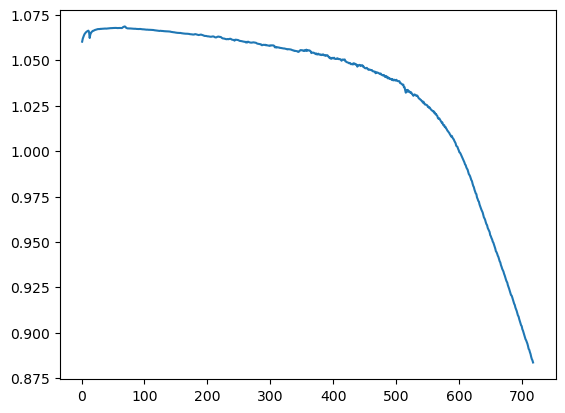

In [166]:
bat = bat_dict['b1c15']

temps = np.mean(bat['summary']['Tavg'][1:])
Y = 1-bat['summary']['QC'][1:]/1.1
length = len(bat['summary']['QC'][1:])
x = np.arange(1,length+1)
plt.plot(x,bat['summary']['QC'][1:])

A = np.ones((length, 3))
A[:,1] = 1/temps
A[:,2] = np.log(x)

In [167]:
print(bat['cycle_life'])

[[719.]]


In [168]:
X = np.linalg.lstsq(A,np.log(Y), rcond=None)

In [169]:
X=X[0]

In [170]:
alpha = np.exp(X[0])
beta = X[1]
gamma = X[2]

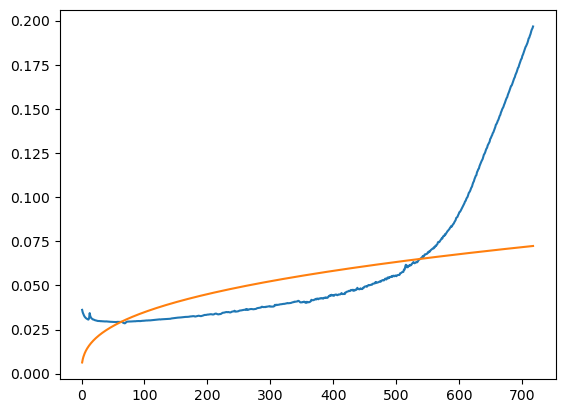

In [171]:
plt.plot(x, Y)
plt.plot(x, alpha*np.exp(beta/temps)*np.power(x,gamma))